Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./whiskey-reviews-dspt4/train.csv')
test = pd.read_csv('./whiskey-reviews-dspt4/test.csv')
print(train.shape, test.shape)

(4087, 3) (1022, 2)


In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [84]:
test.head()

,id,description
0,3461,"\nStyle: Speyside single malt scotch Color: Walnut Aroma: Richly sherried and thick, with notes of nuts and toffee. Wood resins contribute spice and variety. Fruitcake at Christmas. Palate: Thick, chewy in texture, and quite ripe. Again the fruitcake. Very deep and mature with some underlying maltiness. Dry, spicy, oak notes fight off all that sherry and add balance and complexity. Long, soothing finish. \r\n"
1,2604,"\nVery bright and lively, with a nice balance of flavors. Zesty fruit (lemon, peach, ripe pineapple, golden raisin) on a bed of layered sweetness (creamy vanilla, light honey, lightly toasted marshmallow, and a hint of coconut). Gently dry, delicately spicy, dried citrus finish. Light enough and with enough zing to enjoy before dinner, but it should stand up well enough after dinner, too. This is a nice whisky, but it shows a lighter, more elegant side of Glenrothes. It doesn’t express the rich, opulent notes often shown in bottlings like the 1972 Vintage, for example."
2,3341,"\nA new oloroso-forward Chivas positioned to split between the 12 and 18 year olds? I got this. Refined and inviting nose of lemon pith, black fruits, and Kola Kubes. The velvety texture is wonderfully smooth, redolent of an apricot custard Danish, lime zest, raisin, currant, mixed peel, and walnut, with a growing bitter-lemon note. Quite unique finish, like sucking on lumpy Spanish lemons speckled with spices. (LA, NY, Miami, Chicago, Northern California, but will go national)"
3,3764,"\nAged in bourbon casks and then enhanced in Rioja wine casks. A mélange of red berry fruits, firm malt, thick vanilla and spicy oak, along with a hint of grape skin, anise, and orange peel. Gritty, dry finish."
4,2306,"\nThere is a freshness to the wood on the nose, laced with caramel and delicate minty notes. The palate pours pleasantly chewy with molten butterscotch and offers a pleasant jolt of cinnamon and clove that suggests rye at work, before settling on bitter orange peel, salted caramel, and cocoa, leading to a drying leathery and warm spice finish. Nicely done."


In [3]:
# Distribution of ratingCategory: 0 (Excellent), 1 (Good), 2 (Poor)
train.ratingCategory.value_counts(normalize=True)

1    0.704918
0    0.279178
2    0.015904
Name: ratingCategory, dtype: float64

In [4]:
# Read a few reviews from the "Excellent" category
pd.set_option('display.max_colwidth', 0)
train[train.ratingCategory == 0].sample(3)

,id,description,ratingCategory
1555,3840,"\nFinished principally in Pedro Ximenez Spanish sherry casks, Tullibardine 500 Sherry has a fragrant nose, with new leather, beeswax, apple, and vanilla. The palate is smooth and sherried, with more leather, brittle toffee, orange peel, honey, and nutmeg. The fruity finish is notably spicy, with lingering wood polish notes.",0
3257,4264,"\nA stunningly lovely nose: all sweet, rounded, and layered with exotic tropical fruits, scented woods, wax, and perfume. Water makes it oilier and more waxy in nature. Sadly though, the oak has taken charge on the palate, making it more grippy and nutty. Worth a long sniff though! £228",0
557,4374,"\nInitial maturation in sherry and bourbon wood from the U.S. and Sweden, finished in fermented birch sap wine casks. Concentrated heather honey, wax, fresh mascarpone, fruit tarts, and toasted oak. It draws the mouth in: fruity, but not sweet. Stewed, dark fruits from the hedgerow and orchard (cherry, apple, plum, mulberry, and rhubarb), then a delayed splurge of spices and pepper, ending with Brazil nut, espresso, and bitter cacao. It’s all rather austere, serious, and forbidding. €65",0


In [5]:
# Read a few reviews from the "Poor" category
train[train.ratingCategory == 2].sample(3)

,id,description,ratingCategory
1367,5097,"\nTraces of burnt caramel add interest to an otherwise simple, overly sweet palate. A triumvirate of alcohol, chocolate toffee, and pepper. A slight bitterness is more distracting than pleasing or refreshing. Reminiscent of Aunt Jemima pancake syrup, Sailboat is just too sweet to sip solo, but adding ginger ale increases the complexity, as spirit and sweetness mingle with ginger and carbonation. It would benefit from a bit more wood. A very inexpensive whisky, though not a bargain. $20 CAD",2
1614,5050,"\nHuge oak impact for such a young whisky. Fresh oak shavings, dry vanilla, and subtle toasted coconut throughout. Some dried fruit, sultana, and toffee up front, but this is quickly consumed by the oak. Dry, hot, resinous finish. Not an old whisky, but already showing too much oak.\r\n",2
2807,5087,"\nAged in a sherry cask, which adds sweet notes of toffee, Caribbean rum, waxed fruit, red licorice, and fruitcake to go along with the earthy smoke and lingering peat. A much sweeter, fruitier affair than the Croftengea also reviewed here, but behind all that sherry there’s still a whisky that needs a little more maturing. \r\n",2


In [2]:
from explore_data import *

In [7]:
x = train['ratingCategory']
y = train['description']

In [8]:
print(f'The numbers of classes: {get_num_classes(x)}')
print(f'The median number of words per sample: {get_num_words_per_sample(y)}')

The numbers of classes: 3
The median number of words per sample: 70.0


In [9]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

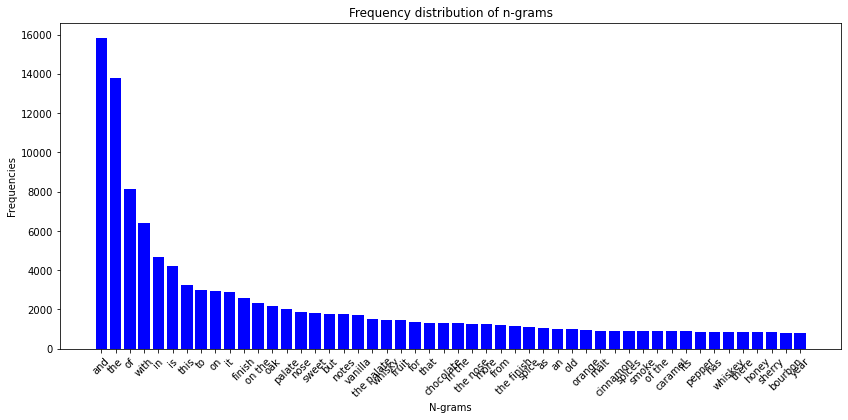

In [10]:
plot_frequency_distribution_of_ngrams(y)

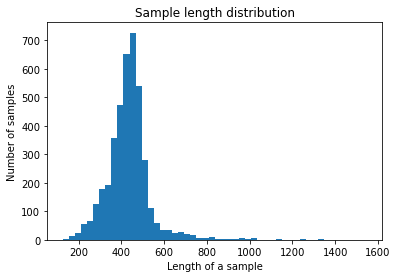

In [11]:
plot_sample_length_distribution(y)

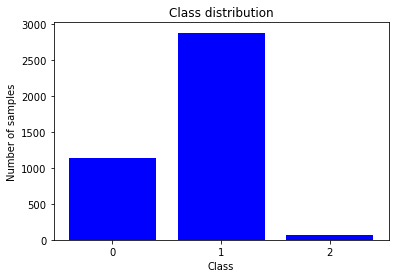

In [12]:
plot_class_distribution(x)

### Split the Training Set into Train/Validation

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['description'], 
                                                    train['ratingCategory'], 
                                                    test_size=0.2, 
                                                    stratify=train['ratingCategory'],
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# u 

# Cross Validation Set - could be used to assert your training set

(3269,) (818,) (3269,) (818,)


### Define Pipeline Components

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()
pipe = Pipeline([('vect', vect), ('clf', rfc)])
# clf - classifier

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [5]:
parameters = {
    'vect__max_df': (0.3, 0.4),
    'vect__min_df': (2, 5, 10),
    'clf__n_estimators': (100, 500),
    'clf__max_depth': (10, 20, None)}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [17]:
grid_search.best_score_

0.7424369295324801

In [18]:
grid_search.best_params_

{'clf__max_depth': None,
 'clf__n_estimators': 100,
 'vect__max_df': 0.4,
 'vect__min_df': 2}

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [13]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [14]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [15]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [16]:
subNumber = 0

In [58]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [21]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD

In [22]:
lsi = TruncatedSVD(algorithm='randomized',
                  n_components = 50)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2),
                      min_df=5,
                      max_df=0.4)
clf = RandomForestClassifier(n_estimators=100,
                            max_depth=None)

pipe = Pipeline([('vect', vect), # Note to self: order of pipeline is important
                 ('lsi', lsi),
                 ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [45]:
parameters = {
    'lsi__n_components': (35,40,45)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.4,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        no

In [46]:
grid_search.best_score_

0.7317307557216516

In [47]:
grid_search.best_params_

{'lsi__n_components': 45}

### Make a Submission File

In [48]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [49]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [41]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [28]:
# Apply to your Dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_dist = {
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [29]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [32]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [57]:
X = get_word_vectors(X_train)
y = get_word_vectors(X_test)
print(len(X) == len(X_train))
print(len(X) == len(X_train))

True
True


In [58]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',
                  alpha =1e-5,
                  hidden_layer_sizes=(16,2),
                  random_state=42)

In [59]:
clf.fit(X, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
yy_test = clf.predict(y)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,yy_test)

0.7053789731051344

### Make a Submission File

In [55]:
# Predictions on test sample
pred = clf.predict(y)

In [64]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

ValueError: array length 818 does not match index length 1022

In [53]:
# Make Sure the Category is an Integer
submission.head()

NameError: name 'submission' is not defined

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model
submission.to_csv(f'./whiskey-reviews-dspt4/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

# What is Sentiment Analysis?
The use of natural language processing, text analysis, computational linguistics, and biometics to systematically identify, extract, quantify, and study affective states and subjective info.
# Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
Document classification is used in the boarder scope of sentiment analysis where it's trying to study the subjectiveness of infomation using document classification. Ex: I'd really truly love going out in this weather! (Trying to determine whether or not this sentence is sarcastic)
# How do we create labeled sentiment data? Are those labels really sentiment? (sentiment data ex: a star review on a amazon review)
Labeled sentiment data is created manually when you and someone label the data itself. Those labels are really sentiment; it's the reason why they are manually labeled by people in the first place.
# What are common applications of sentiment analysis?
The common applications of sentiment analysis are classifying polarity of a given text,quantifying patterns in text, and detecting polarity of product and movie reivews.
# Research why word embeddings worked better for the lecture notebook than on the whiskey competition
